In [21]:
import osggvgv
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(22)

In [22]:
def load_normal(norm_path):
    norm_files = np.array(os.listdir(norm_path))
    norm_labels = np.array(['normal']*len(norm_files))
    
    norm_images = []
    for image in tqdm(norm_files):
        image = cv2.imread(norm_path + image)
        image = cv2.resize(image, dsize=(200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        norm_images.append(image)
        
    norm_images = np.array(norm_images)
    
    return norm_images, norm_labels
def load_pneumonia(pneu_path):
    pneu_files = np.array(os.listdir(pneu_path))
    pneu_labels = np.array([pneu_file.split('_')[1] for pneu_file in pneu_files])
    
    pneu_images = []
    for image in tqdm(pneu_files):
        image = cv2.imread(pneu_path + image)
        image = cv2.resize(image, dsize=(200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        pneu_images.append(image)
        
    pneu_images = np.array(pneu_images)
    
    return pneu_images, pneu_labels

In [25]:
norm_images, norm_labels = load_normal('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/')
pneu_images, pneu_labels = load_pneumonia('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/')
print (norm_labels)
print(norm_images)
print(pneu_labels)
print(pneu_images)

100%|██████████| 3875/3875 [00:40<00:00, 96.47it/s] 


['normal' 'normal' 'normal' ... 'normal' 'normal' 'normal']
[[[158   2  41 ...   2   0   0]
  [  0   3  57 ...   6   3   0]
  [150   1  38 ...  25  10   0]
  ...
  [ 35  39  45 ...  41  34  36]
  [ 39  33  40 ...  43  36  38]
  [ 55  33  38 ...  36  37  63]]

 [[ 98  89  96 ...  69  69  68]
  [109  99  94 ...  71  78  76]
  [136  96  98 ...  74  69  76]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  7   0   1 ...  20  21  47]
  [ 10   3   8 ...  19  22  41]
  [  8   3   7 ...  22  26  29]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[ 44  37  55 ...  40  39  31]
  [ 38  40  47 ...  46  44  45]
  [ 36  38  47 ...  54  59  54]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[113 109 112 ... 106 109 105]
  [115 105 109 ... 102 108 117]
  [112 118 126 ... 104 109 124]
  ...
  [ 20  21  17 ...  12  14  15]


In [99]:
x_train = np.append(norm_images, pneu_images, axis=0)
y_train = np.append(norm_labels, pneu_labels)

In [100]:
print(x_train.shape)
print(y_train.shape)

(5216, 200, 200)
(5216,)


In [31]:
np.unique(y_train,return_counts=True)

(array(['bacteria', 'normal', 'virus'], dtype='<U8'),
 array([2530, 1341, 1345]))

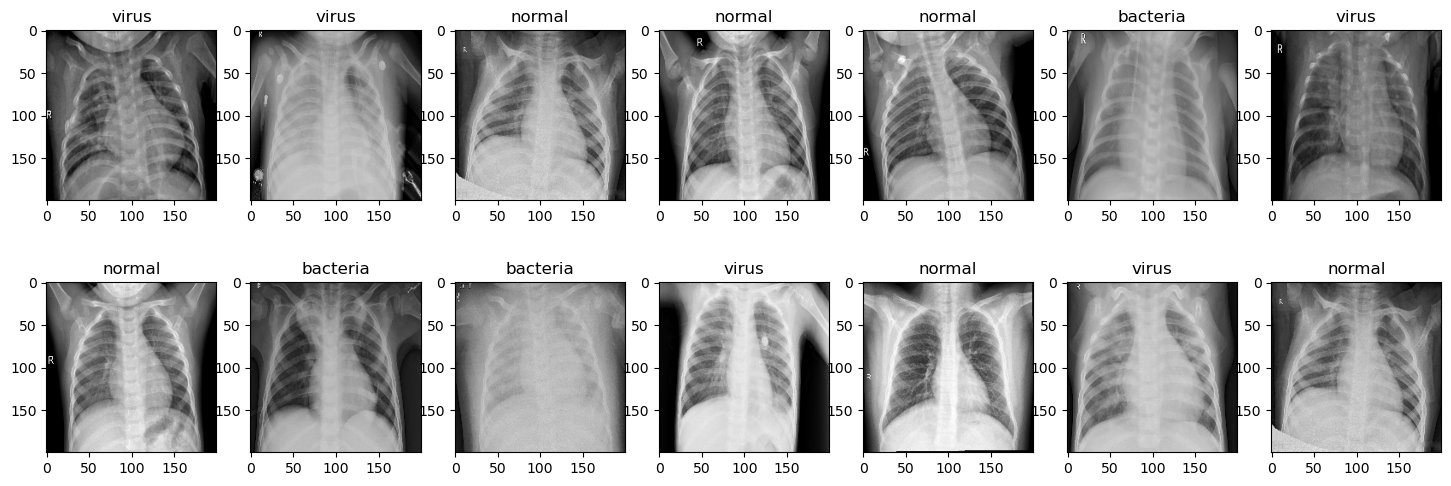

In [58]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(18,6))

indices = np.random.choice(len(X_train), 14)
counter = 0

for i in range(2):
    for j in range(7):
        axes[i,j].set_title(y_train[indices[counter]])
        axes[i,j].imshow(X_train[indices[counter]], cmap='gray')
        axes[i,j].get_xaxis().set_visible(True)
        axes[i,j].get_yaxis().set_visible(True)
        counter += 1
plt.show()

In [101]:
norm_images_test, norm_labels_test = load_normal('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/')
pneu_images_test, pneu_labels_test = load_pneumonia('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/')
x_test = np.append(norm_images_test, pneu_images_test, axis=0)
y_test = np.append(norm_labels_test, pneu_labels_test)

100%|██████████| 390/390 [00:03<00:00, 113.06it/s]


In [102]:
print(x_test.shape,y_test.shape)

(624, 200, 200) (624,)


In [97]:
  # save variables
with open('pneumonia_data.pickle', 'wb') as f:
    pickle.dump((x_train, x_test, y_train, y_test), f)
    # load variables
with open('pneumonia_data.pickle', 'rb') as f:
    (x_train, x_test, y_train, y_test) = pickle.load(f)

In [103]:
y_train=y_train[:,np.newaxis]
y_test=y_test[:,np.newaxis]

In [109]:
one_hot_encoder=OneHotEncoder(sparse=False)

In [110]:
y_train_enc = one_hot_encoder.fit_transform(y_train)

In [111]:
y_train_enc

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [113]:
y_test_enc=one_hot_encoder.fit_transform(y_test)
y_test_enc

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [115]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [116]:
print(x_train.shape, x_test.shape)#extra dim is used to indicate no. of colour channels, 1 for gray

(5216, 200, 200, 1) (624, 200, 200, 1)


In [117]:
#data augmentation by increasing training data by performing translations, rotations, scaling, shearing, and flips
datagen = ImageDataGenerator(
        rotation_range = 5,  
        zoom_range = 0.2, 
        width_shift_range = 0.15, 
        height_shift_range = 0.15)

In [119]:
datagen.fit(x_train)
train_gen = datagen.flow(x_train, y_train_enc, batch_size=32)
#allows the model to receive new variations of the images at each epoch
#returns the transformed images and does not add it to the set of training images

In [127]:
from keras import models

In [128]:
cnn=models.Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same',input_shape=[200,200,1]))
cnn.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Conv2D(32, (2, 2), activation='relu', strides=(1, 1), padding='samse'))
cnn.add(Conv2D(32, (2, 2), activation='relu', strides=(1, 1), padding='same'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(3, activation='softmax'))

In [129]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 200, 200, 32)      320       
                                                                 
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      4128      
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 32)      4128      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                  

In [130]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [138]:
history=cnn.fit_generator(train_gen,epochs=20, verbose=1, validation_data=(x_test, y_test_enc))#10:17-12:29

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


163/163 [==============================] - 385s 2s/step - loss: 0.6945 - accuracy: 0.6950 - val_loss: 0.7464 - val_accuracy: 0.7853
Epoch 2/20
163/163 [==============================] - 384s 2s/step - loss: 0.6503 - accuracy: 0.7216 - val_loss: 0.6246 - val_accuracy: 0.7756
Epoch 3/20
163/163 [==============================] - 382s 2s/step - loss: 0.6492 - accuracy: 0.7132 - val_loss: 0.8743 - val_accuracy: 0.6378
Epoch 4/20
163/163 [==============================] - 380s 2s/step - loss: 0.6575 - accuracy: 0.7134 - val_loss: 0.8516 - val_accuracy: 0.7051
Epoch 5/20
163/163 [==============================] - 383s 2s/step - loss: 0.6729 - accuracy: 0.7118 - val_loss: 0.8616 - val_accuracy: 0.7019
Epoch 6/20
163/163 [==============================] - 378s 2s/step - loss: 0.6472 - accuracy: 0.7186 - val_loss: 0.7496 - val_accuracy: 0.7628
Epoch 7/20
163/163 [==============================] - 378s 2s/step - loss: 0.6124 - accuracy: 0.7412 - val_loss: 0.8705 - val_accuracy: 0.7260
Epoch 8/20

In [ ]:
#Accuracy achieved = 82.53%

In [139]:
cnn.save('pneumonia detection.h5')

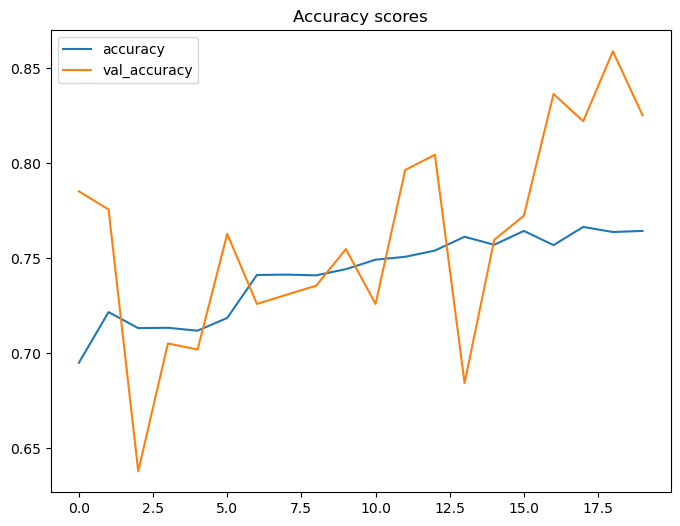

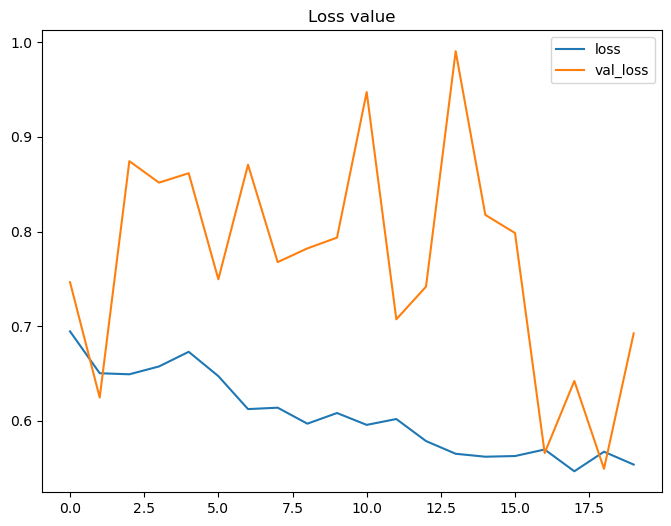

In [141]:
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()
plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()


In [142]:
predictions = cnn.predict(x_test)
predictions = one_hot_encoder.inverse_transform(predictions)

20/20 [==============================] - 10s 494ms/step


In [144]:
cm = confusion_matrix(y_test, predictions)

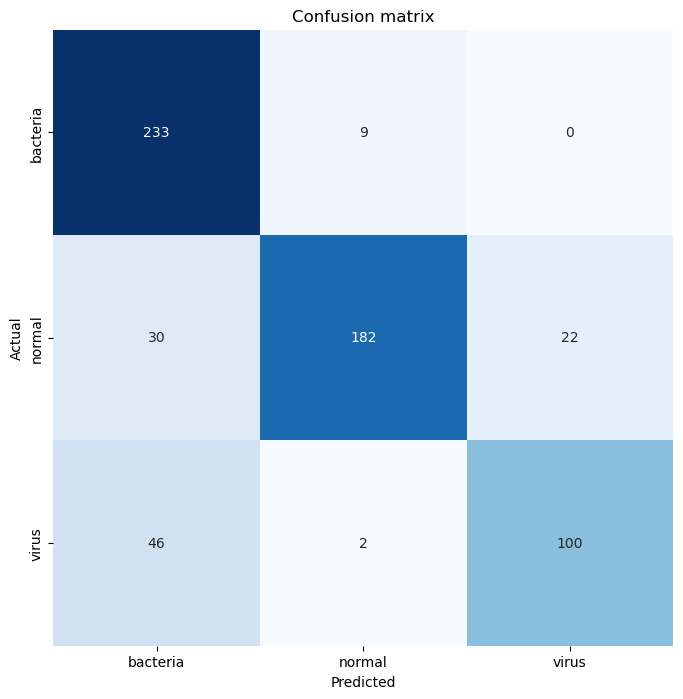

In [145]:
classnames = ['bacteria', 'normal', 'virus']
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [160]:
image= cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')
image = cv2.resize(image, dsize=(200,200))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_arr=np.array(image)

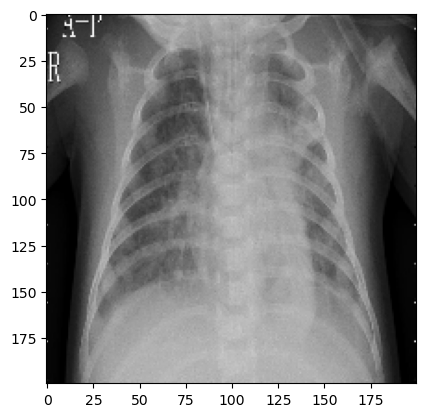

In [165]:
plt.imshow(image,cmap='gray')
plt.show()

In [161]:
img_arr=img_arr.reshape(1,200,200, 1)
img_arr.shape

(1, 200, 200, 1)

In [162]:
pred=cnn.predict(img_arr)
print(pred)

1/1 [==============================] - 0s 43ms/step
[[6.2064952e-01 4.2253833e-07 3.7935004e-01]]


In [ ]:
#Output: Probabilty of belonging to bacteria class of pneumonia is highest for the given input, 
#which actually belongs to the bacteria class